In [31]:
# import libraries
from pycaret.classification import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
df = pd.read_csv('scaled_data.csv') # use os to store csv file
# use os to store csv file

x = df.drop(['Credit_Score'],axis=1) # drop target variable
column = x.columns # store column names
y = df["Credit_Score"] # target variable



In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # split data into train and test set

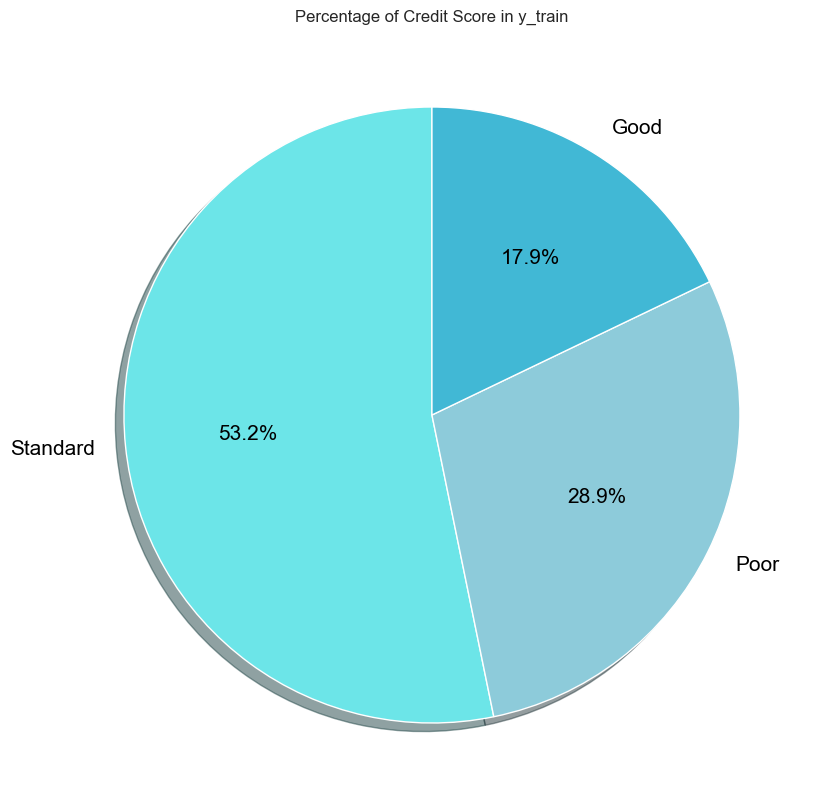

In [34]:
# plot percentage of y-train as pie chart
y_train_copy = y_train.copy() # copy y_train
y_train_copy = y_train_copy.map({0:"Poor",1:"Standard",2:"Good"}) # map 0,1,2 to Poor,Standard,Good
sns.set_theme(style="darkgrid") # set theme
plt.figure(figsize=(10,10)) # set figure size
colro = ["#6CE5E8","#8DCBDA","#41B8D5"] # set color
plt.pie(y_train_copy.value_counts(),labels=y_train_copy.value_counts().index,autopct='%1.1f%%',shadow=True, startangle=90,colors=colro,textprops={'color':"black",'fontsize': 15}) # plot pie chart
plt.title("Percentage of Credit Score in y_train") # set title
plt.show() # show plot


In [35]:
# SMOTE it use to deal with imbalanced data and it will oversampling the minority class
sm = SMOTE(k_neighbors=5) # set SMOTE
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train) # fit and resample data

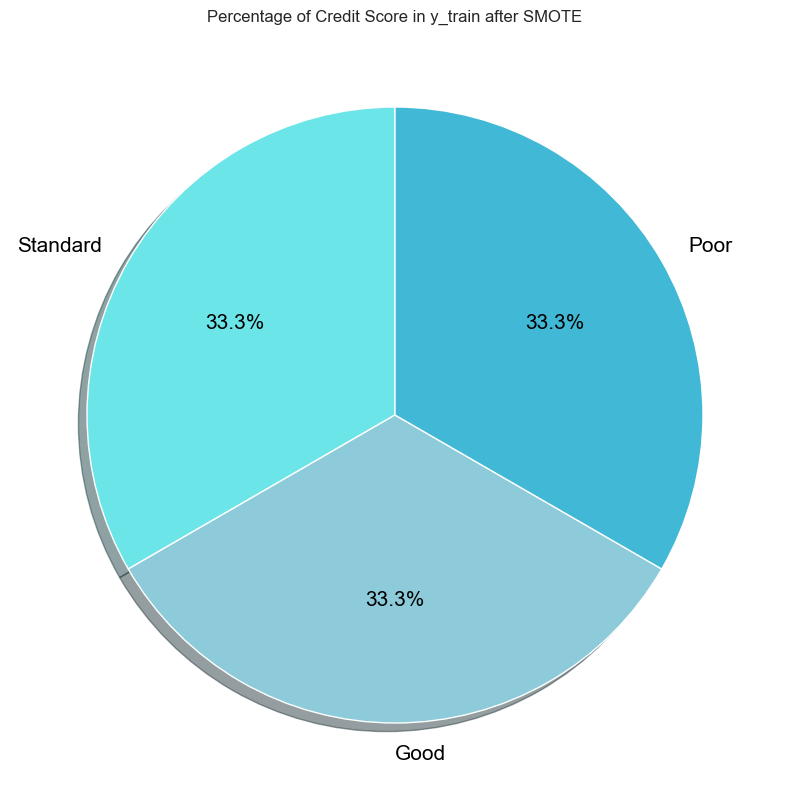

In [36]:
# plot percentage of y-train after SMOTE as pie chart
y_train_sm_copy = y_train_sm.copy() # copy y_train_sm
y_train_sm_copy = y_train_sm_copy.map({0:"Poor",1:"Standard",2:"Good"}) # map 0,1,2 to Poor,Standard,Good
sns.set_theme(style="darkgrid") # set theme
plt.figure(figsize=(10,10)) # set figure size
plt.pie(y_train_sm_copy.value_counts(),labels=y_train_sm_copy.value_counts().index,autopct='%1.1f%%',shadow=True, startangle=90,colors=colro,textprops={'color':"black",'fontsize': 15}) # plot pie chart
plt.title("Percentage of Credit Score in y_train after SMOTE") # set title
plt.show() # show plot

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # set random forest model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42) # set extra tree model
knn_model = KNeighborsClassifier(n_neighbors=3) # set KNN model
des_tree = DecisionTreeClassifier(random_state=42) # set decision tree model


In [38]:
rf_model.fit(x_train_sm, y_train_sm) # fit random forest model
et_model.fit(x_train_sm, y_train_sm) # fit extra tree model
knn_model.fit(x_train_sm, y_train_sm) # fit KNN model
des_tree.fit(x_train_sm, y_train_sm) # fit decision tree model

DecisionTreeClassifier(random_state=42)

In [39]:
rf_predictions = rf_model.predict(x_test) # predict random forest model
et_predictions = et_model.predict(x_test) # predict extra tree model
knn_predictions = knn_model.predict(x_test) # predict KNN model
des_predictions = des_tree.predict(x_test) # predict decision tree model

voting classifier with hard voting it will take the majority of votes from all the models

In [40]:
ensemble_model = VotingClassifier(estimators=[ # ensemble model with voting classifier
    ('Random Forest', rf_model), # Random Forest model
    ('Extra Trees', et_model), # Extra Trees model
    ("Decision Tree", des_tree), # Decision Tree model
    ("KNN", knn_model) # KNN model
], voting='hard',weights=[1,1,1,1])

In [41]:
ensemble_model.fit(x_train_sm, y_train_sm) # fit ensemble model

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Extra Trees',
                              ExtraTreesClassifier(random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))],
                 weights=[1, 1, 1, 1])

In [42]:
ensemble_predictions = ensemble_model.predict(x_test) # predict ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions) # calculate ensemble model accuracy
print(f"Ensemble Model Accuracy: {ensemble_accuracy}") # print ensemble model accuracy

Ensemble Model Accuracy: 0.8414


In [43]:
rf_accuracy = accuracy_score(y_test, rf_predictions) # calculate random forest model accuracy
et_accuracy = accuracy_score(y_test, et_predictions) # calculate extra tree model accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions) # calculate KNN model accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions) # calculate ensemble model accuracy
des_accuracy = accuracy_score(y_test, des_predictions) # calculate decision tree model accuracy


print(f"Random Forest Classifier Accuracy: {rf_accuracy}") # print random forest model accuracy
print(f"Extra Trees Classifier Accuracy: {et_accuracy}") # print extra tree model accuracy
print(f"KNN Classifier Accuracy: {knn_accuracy}") # print KNN model accuracy
print(f"Ensemble Model Accuracy: {ensemble_accuracy}") # print ensemble model accuracy
print(f"Decision Tree Accuracy: {des_accuracy}") # print decision tree model accuracy





Random Forest Classifier Accuracy: 0.8393
Extra Trees Classifier Accuracy: 0.83855
KNN Classifier Accuracy: 0.82725
Ensemble Model Accuracy: 0.8414
Decision Tree Accuracy: 0.8244


creates a bar plot that displays the accuracy of different machine learning models. It uses the scikit-learn library to calculate the accuracy scores and stores them in a pandas DataFrame. The seaborn library is used to create the bar plot, and the `annotate` method is used to add text to the plot. Finally, the plot is displayed using the `show` method from matplotlib.

In [44]:
res_plot = pd.DataFrame({
    "Random Forest": [rf_accuracy],
    "Extra Trees": [et_accuracy],
    "KNN": [knn_accuracy],
    "Ensemble Model": [ensemble_accuracy],
    "Decision Tree": [des_accuracy]
}, index=["Accuracy"])
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round((p.get_height()+.0001) * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models")
plt.show()


In [46]:
cross_val_rf = cross_val_predict(rf_model, x_train_sm, y_train_sm, cv=10) # cross validation for random forest model
cross_val_et = cross_val_predict(et_model, x_train_sm, y_train_sm, cv=10) # cross validation for extra tree model
cross_val_knn = cross_val_predict(knn_model, x_train_sm, y_train_sm, cv=10) # cross validation for KNN model
cross_val_des = cross_val_predict(des_tree, x_train_sm, y_train_sm, cv=10) # cross validation for decision tree model
cross_val_ensemble = cross_val_predict(ensemble_model, x_train_sm, y_train_sm, cv=10) # cross validation for ensemble model

print(f"Random Forest Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_rf)}") # print random forest model accuracy
print(f"Extra Trees Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_et)}") # print extra tree model accuracy
print(f"KNN Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_knn)}") # print KNN model accuracy
print(f"Ensemble Model Accuracy: {accuracy_score(y_train_sm, cross_val_ensemble)}") # print ensemble model accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_train_sm, cross_val_des)}") # print decision tree model accuracy

Random Forest Classifier Accuracy: 0.8851203758073987
Extra Trees Classifier Accuracy: 0.8865374828733608
KNN Classifier Accuracy: 0.8852064983362693
Ensemble Model Accuracy: 0.8871481698962616
Decision Tree Accuracy: 0.8672382070855353


creates a bar plot that shows the accuracy of different machine learning models with cross-validation. It uses the scikit-learn library to calculate the accuracy scores and stores them in a pandas DataFrame. The seaborn library is used to create the bar plot, and the `annotate` method is used to add text to the plot. Finally, the plot is displayed using the `show` method from matplotlib.

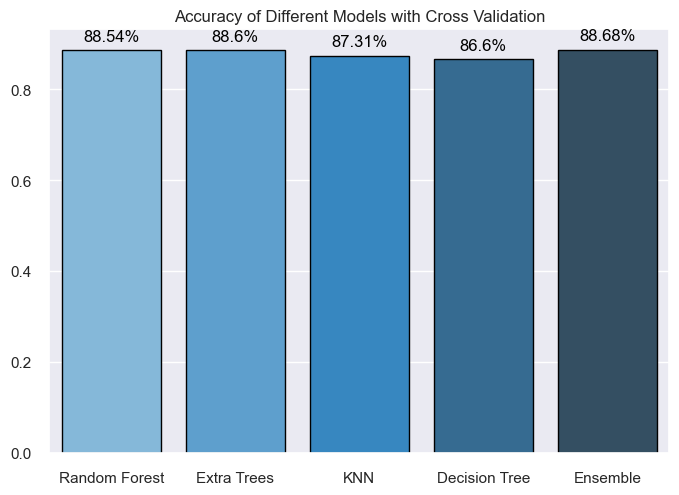

In [ ]:
res_plot_vol = pd.DataFrame({
    "Random Forest": [accuracy_score(y_train_sm, cross_val_rf)],
    "Extra Trees": [accuracy_score(y_train_sm, cross_val_et)],
    "KNN": [accuracy_score(y_train_sm, cross_val_knn)],
    "Decision Tree": [accuracy_score(y_train_sm, cross_val_des)],
    "Ensemble": [accuracy_score(y_train_sm, cross_val_ensemble)]
})
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot_vol, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height() * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models with Cross Validation")
plt.show()



In [52]:
X_train_copy = x_train_sm.copy() # copy x_train_sm
X_train_copy["Credit_Score"] = y_train_sm # add y_train_sm to x_train_sm
pycaret_model = setup(data=X_train_copy, target="Credit_Score", session_id=42) # set pycaret model

In [54]:
compare=compare_models() # compare models

Initiated  . . . . . . . . . . . . . . . . . .              11:27:26
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library